## Demo of using PercentualDeadBand

In [14]:
from noisy_load_profiles import perturbations, Pipeline
import numpy as np
import matplotlib.pyplot as plt

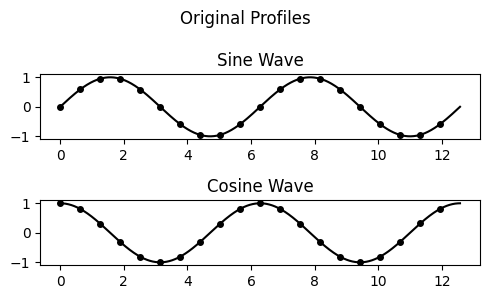

In [15]:
# build original load profiles, a sine and a cosine wave
timesteps = 1000
t = np.linspace(0, 4 * np.pi, timesteps)
original_profiles = np.array([np.sin(t), np.cos(t)])
original_profiles = original_profiles.T # shape (timesteps, 2)


# plot original profiles
fig, axs = plt.subplots(2, 1, figsize=(5, 3))

axs[0].plot(t, original_profiles[:, 0], label='Original Sine Wave', color="black", marker='o', markersize=4, markevery=50)
axs[0].set_title('Sine Wave')

axs[1].plot(t, original_profiles[:, 1], label='Original Cosine Wave', color='black',  marker='o', markersize=4, markevery=50)
axs[1].set_title('Cosine Wave')

fig.suptitle('Original Profiles')
fig.tight_layout()

In [16]:
help(perturbations.PercentualDeadBand)

Help on class PercentualDeadBand in module noisy_load_profiles.perturbations.measurement:

class PercentualDeadBand(noisy_load_profiles.base.Perturbation)
 |  PercentualDeadBand(initial_deviation: float = 0.01, timesteps: int = 4, eps_den: float = 1e-12, seed: Optional[int] = None, transformation: Optional[Dict[str, Any]] = None, track_input_profiles: bool = False)
 |
 |  Applies a deadband on percentage change relative to the last reported value.
 |  A deadband means that if the percentual change from the last reported value does NOT exceed the 'deadband threshold', you simply report the last reported value again.
 |  The deadband threshold decreases over time, allowing for more precise reporting as the process stabilizes.
 |
 |
 |  After each report, the acceptable percentual deviation shrinks over time as:
 |
 |      deadband[t_since_report] = linspace(initial_deviation, 0.0, timesteps)[t]
 |
 |  where t is capped at timesteps-1. When the percentual change exceeds the
 |  current th

In [17]:
# initialize a perturbation
perturbation = perturbations.PercentualDeadBand(initial_deviation=0.4, timesteps=500, seed=42)

# add a perturbation to a pipeline
pipeline = Pipeline([perturbation])

# apply the perturbation to the profiles
perturbed_profiles = pipeline.apply(original_profiles)


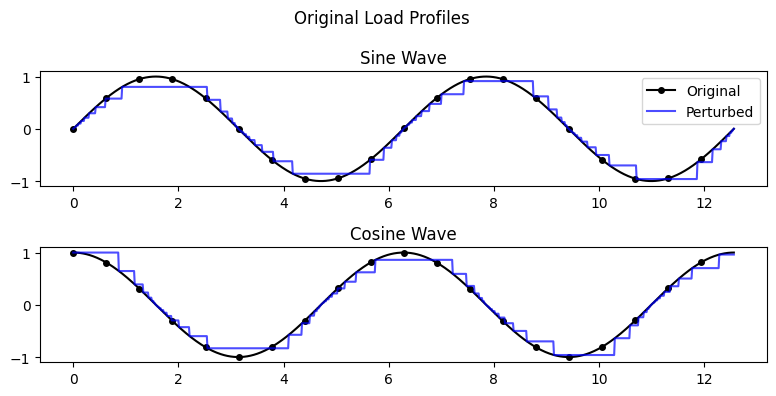

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].plot(t, original_profiles[:, 0], label='Original', color="black", marker='o', markersize=4, markevery=50)
axs[0].plot(t, perturbed_profiles[:, 0], label='Perturbed', color='blue', alpha=0.7)
axs[0].set_title('Sine Wave')
axs[0].legend()

axs[1].plot(t, original_profiles[:, 1], label='Original', color='black',  marker='o', markersize=4, markevery=50)
axs[1].plot(t, perturbed_profiles[:, 1], label='Perturbed', color='blue' , alpha=0.7)
axs[1].set_title('Cosine Wave')


fig.suptitle('Original Load Profiles')
fig.tight_layout()